In [804]:
import pandas as pd
from functions import data_treatment, request, product_pricing, df_to_all_df, format_all_df
import seaborn as sns
import matplotlib.pyplot as plt

In [805]:
product_database = {}
weeks = 36
all_df = pd.DataFrame([])
all_jsons = []

for week in range(weeks):
    json = data_treatment(request())
    json, product_database = product_pricing(json, product_database)
    all_jsons.append(json)

In [806]:
def df_to_analysis(all_jsons:list, column_name:str):
    new_json = {}
    n = 0
    for week in range(len(all_jsons)):
        for transaction in range(len(all_jsons[week])):
            balance = 0
            new_json[n] = {}
            new_json[n]['date'] = all_jsons[week][transaction]['date']
            new_json[n]['week'] = f'Week {week+1}'
            new_json[n]['month']=all_jsons[week][transaction]['date']
            new_json[n]['id'] = all_jsons[week][transaction]['id']
            for i in range(0,21):
                new_json[n][f'prod_{i}'] = 0
            for key in all_jsons[week][transaction]:
                if ('prod' in key):
                    if (type(all_jsons[week][transaction][key][column_name])==list): #teste
                        new_json[n][key] = float(all_jsons[week][transaction][key][column_name][0])
                    else:
                        new_json[n][key] = float(all_jsons[week][transaction][key][column_name])
                    balance += new_json[n][key]
            n += 1  
    df = pd.DataFrame(new_json).T
    df['balance'] = balance
    df['date'] = pd.to_datetime(df['date']).dt.date
    df['month'] = pd.to_datetime(df['month']).dt.month_name()


    return df

In [807]:
sum_all_prods = {f'prod_{i}':'sum' for i in range(20)}
sum_all_prods['balance']='sum'

In [808]:
def consolidate(df_qnt, df_price, df_consolidate):
    for prod in df_qnt.columns:
        df_consolidate[prod]=df_qnt[prod]*df_price[prod]
    return df_consolidate

In [809]:
def balance_product(df):
    list = []
    for row in df.index:
        list.append(df.loc[row].sum())
    return list

#### Dataframe - Quantidades de produtos vendidos 

In [810]:
all_qnt= df_to_analysis(all_jsons=all_jsons, column_name='qnt')
all_qnt.head()

,date,week,month,id,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,...,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19,prod_20,balance
0,2026-01-29,Week 1,January,lahga7phf1s5owttuuc,48.0,0,0,10.0,37.0,0,...,0,0,0,2653.242814,0,0,0,0,0,3124.242214
1,2026-01-29,Week 1,January,lahga7pko8t98ofzcw,35.0,46.0,0,0,0,20.0,...,0,0,0,2873.633181,0,0,0,0,0,3124.242214
2,2026-01-28,Week 1,January,lahga7pmitghgtwvri,0,0,0,47.0,12.0,0,...,0,0,0,3000.53938,0,0,0,0,0,3124.242214
3,2026-01-28,Week 1,January,lahga7po3tyhn6r3a3d,34.0,19.0,8.0,30.0,44.0,0,...,0,0,0,2600.88352,0,0,0,0,0,3124.242214
4,2026-01-28,Week 1,January,lahga7pqw1eyzmgqenc,0,8.0,0,0,6.0,0,...,0,0,0,3037.388076,0,0,0,0,0,3124.242214


#### Agrupamento - Quantidade - Semana

In [811]:
weekly_qnt= all_qnt.groupby('week', sort=False).agg(sum_all_prods)
weekly_qnt.head()

,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,...,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19,balance
week,,,,,,,,,,,,,,,,,,,,,
Week 1,218.0,212.0,143.0,128.0,260.0,154.0,192.0,273.0,907.0,1948.107578,...,2036.615440,0,0,0,39038.884248,0,0,0,0,43739.390992
Week 2,49.0,37.0,47.0,89.0,43.0,79.0,24.0,101.0,1057.0,990.343118,...,1661.470525,0,0,0,14351.545313,0,0,0,0,15621.211069
Week 3,202.0,130.0,114.0,145.0,187.0,153.0,333.0,107.0,4989.0,4339.682971,...,4629.845691,0,0,0,37330.622125,0,0,0,0,40615.148779
Week 4,63.0,93.0,250.0,83.0,76.0,128.0,102.0,163.0,3473.0,341.282894,...,1504.426706,0,0,0,25676.796676,0,0,0,0,28118.179924
Week 5,162.0,270.0,300.0,241.0,294.0,230.0,212.0,412.0,928.0,1634.050251,...,1860.600732,0,0,0,55585.737674,0,0,0,0,62484.844275


In [812]:
weekly_qnt_to_boxplot = weekly_qnt.T
weekly_qnt_to_boxplot=weekly_qnt_to_boxplot.agg({f'Week {i+1}':'sum' for i in range(weeks)}).to_frame().rename(columns={0:'QUANTITIES'})
weekly_qnt_to_boxplot['WEEKS']=[x for x in range(weeks)]

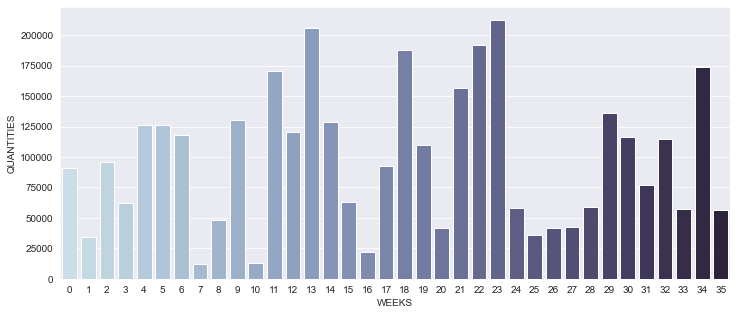

In [813]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x=weekly_qnt_to_boxplot['WEEKS'], y=weekly_qnt_to_boxplot['QUANTITIES'], palette="ch:s=.25,rot=-.25")
sns.set_style('darkgrid')

#### Agrupamento - Quantidade - Mensal

In [814]:
monthly_qnt= all_qnt.groupby('month', sort=False).agg(sum_all_prods)
monthly_qnt.head()

,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,...,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19,balance
month,,,,,,,,,,,,,,,,,,,,,
January,218.0,212.0,143.0,128.0,260.0,154.0,192.0,273.0,907.0,1948.107578,...,2036.615440,0,0,0,39038.884248,0,0,0,0,43739.390992
February,476.0,530.0,711.0,558.0,600.0,590.0,671.0,783.0,10447.0,7305.359234,...,9656.343653,0,0,0,132944.701788,0,0,0,0,146839.384046
March,844.0,476.0,538.0,595.0,577.0,446.0,537.0,432.0,9906.0,10859.500197,...,10284.808784,0,0,0,116696.916735,0,0,0,0,140590.899618
April,1250.0,1241.0,1556.0,1353.0,1391.0,1307.0,1396.0,1370.0,17119.0,16572.051506,...,21363.864919,0,0,0,216565.568250,0,0,0,0,337418.159084
May,427.0,707.0,873.0,463.0,644.0,675.0,690.0,700.0,11915.0,13374.985462,...,10983.333789,0,0,0,95540.334731,0,0,0,0,156212.110687


In [815]:
monthly_qnt.to_csv('monthly_revenue.csv')

In [816]:
monthly_qnt_to_boxplot = monthly_qnt.T
monthly_qnt_to_boxplot=monthly_qnt_to_boxplot.agg({f'{monthly_qnt.index[i]}':'sum' for i in range(len(monthly_qnt.index))}).to_frame().rename(columns={0:'QUANTITIES'})
monthly_qnt_to_boxplot['MONTHS']=[x for x in range(len(monthly_qnt.index))]

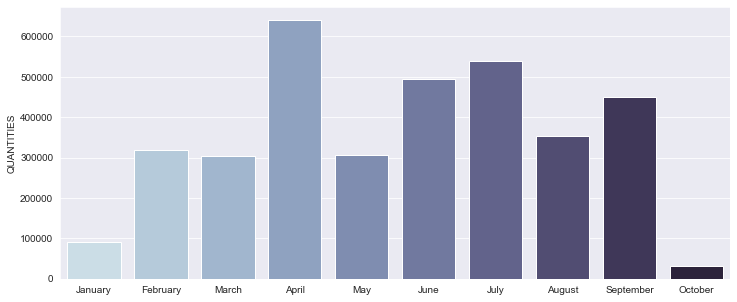

In [817]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x=monthly_qnt_to_boxplot.index, y=monthly_qnt_to_boxplot['QUANTITIES'], palette="ch:s=.25,rot=-.25")
sns.set_style('darkgrid')

C:\Users\cliente\AppData\Local\Temp/ipykernel_4252/2200561911.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=monthly_qnt_to_boxplot.index, y=monthly_qnt_to_boxplot['QUANTITIES'], palette="ch:s=.25,rot=-.25")


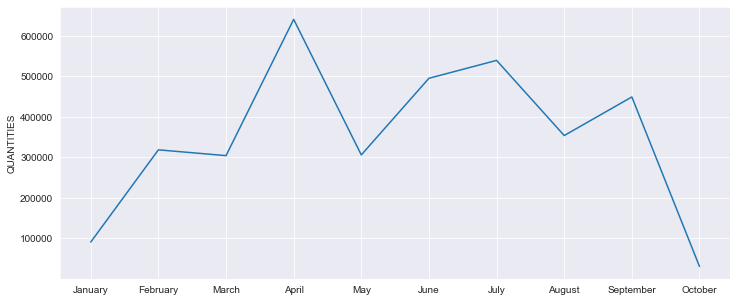

In [818]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(x=monthly_qnt_to_boxplot.index, y=monthly_qnt_to_boxplot['QUANTITIES'], palette="ch:s=.25,rot=-.25")
sns.set_style('darkgrid')

#### DataFrame - Preço dos produtos

In [819]:
all_prices= df_to_analysis(all_jsons=all_jsons, column_name='price')
all_prices.head()

,date,week,month,id,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,...,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19,prod_20,balance
0,2026-01-29,Week 1,January,lahga7phf1s5owttuuc,7.89,0,0,68.95,78.22,0,...,0,0,0,87.13,0,0,0,0,0,3.710677e+08
1,2026-01-29,Week 1,January,lahga7pko8t98ofzcw,7.89,9.91,0,0,0,72.8,...,0,0,0,87.13,0,0,0,0,0,3.710677e+08
2,2026-01-28,Week 1,January,lahga7pmitghgtwvri,0,0,0,68.95,78.22,0,...,0,0,0,87.13,0,0,0,0,0,3.710677e+08
3,2026-01-28,Week 1,January,lahga7po3tyhn6r3a3d,7.89,9.91,79.1,68.95,78.22,0,...,0,0,0,87.13,0,0,0,0,0,3.710677e+08
4,2026-01-28,Week 1,January,lahga7pqw1eyzmgqenc,0,9.91,0,0,78.22,0,...,0,0,0,87.13,0,0,0,0,0,3.710677e+08


In [820]:
all_prices.to_csv('all_prices.csv')

#### Agrupamento - Preço - Semana

In [821]:
weekly_price= all_prices.groupby('week', sort=False).agg(sum_all_prods)
weekly_price.head()

,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,...,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19,balance
week,,,,,,,,,,,,,,,,,,,,,
Week 1,55.2300,69.370000,553.700000,344.75000,782.200000,291.200000,563.360000,94.08,710.800,773.28,...,596.88,0,0,0,1219.8200,0,0,0,0,5.194948e+09
Week 2,7.8900,19.820000,158.200000,137.90000,156.440000,291.200000,140.840000,35.28,284.320,257.76,...,265.28,0,0,0,435.6500,0,0,0,0,1.855339e+09
Week 3,82.8450,104.054998,593.250000,517.12500,703.979999,873.599996,950.659415,70.56,1386.060,1159.92,...,596.88,0,0,0,1699.0350,0,0,0,0,4.823880e+09
Week 4,53.2575,66.892498,1245.825000,465.41250,879.974999,818.999989,792.216179,158.76,1119.510,773.28,...,447.66,0,0,0,1764.3825,0,0,0,0,3.339609e+09
Week 5,213.0300,401.354987,2669.624999,2094.35625,3431.900940,2702.699963,1901.318825,515.97,3598.425,4349.70,...,1566.81,0,0,0,5881.2750,0,0,0,0,7.421354e+09


#### Agrupamento - Preço - Mensal

In [822]:
monthly_price=all_prices.groupby('month').agg(sum_all_prods)
monthly_price.head()

,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,...,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19,balance
month,,,,,,,,,,,,,,,,,,,,,
April,3.202534e+04,9.345353e+03,3.209377e+05,9.729850e+04,7.333500e+04,8.221448e+04,3.096304e+05,3.237495e+04,4.250260e+05,5.375436e+05,...,6.609914e+04,0,0,0,7.557467e+05,0,0,0,0,4.007531e+10
August,4.621077e+06,1.295707e+06,1.527982e+08,1.429728e+07,3.761995e+07,3.180421e+07,1.603609e+08,1.763150e+07,2.318726e+08,2.737583e+08,...,3.627060e+07,0,0,0,3.910739e+08,0,0,0,0,1.892445e+10
February,3.570225e+02,5.921225e+02,4.666900e+03,3.214794e+03,5.172296e+03,4.686500e+03,3.785034e+03,7.805700e+02,6.388315e+03,6.540660e+03,...,2.876630e+03,0,0,0,9.780342e+03,0,0,0,0,1.744018e+10
January,5.523000e+01,6.937000e+01,5.537000e+02,3.447500e+02,7.822000e+02,2.912000e+02,5.633600e+02,9.408000e+01,7.108000e+02,7.732800e+02,...,5.968800e+02,0,0,0,1.219820e+03,0,0,0,0,5.194948e+09
July,6.433315e+05,1.124157e+05,2.749455e+07,1.792797e+06,7.058992e+06,5.837640e+06,2.436673e+07,2.517367e+06,3.822372e+07,4.909401e+07,...,5.369889e+06,0,0,0,5.864309e+07,0,0,0,0,2.820115e+10


#### Consolidate (Preços x Quantidades)

#### Consolidado Semanal

In [823]:
df_consolidate_week = pd.DataFrame([])
df_consolidate_week = consolidate(weekly_qnt, weekly_price, df_consolidate_week)
df_consolidate_week.head()

,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,...,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19,balance
week,,,,,,,,,,,,,,,,,,,,,
Week 1,12040.140000,14706.440000,79179.100000,44128.000000,2.033720e+05,44844.800000,108165.120000,25683.840000,644695.60,1.506433e+06,...,1.215615e+06,0,0,0,4.762041e+07,0,0,0,0,2.272239e+14
Week 2,386.610000,733.340000,7435.400000,12273.100000,6.726920e+03,23004.800000,3380.160000,3563.280000,300526.24,2.552708e+05,...,4.407549e+05,0,0,0,6.252251e+06,0,0,0,0,2.898264e+13
Week 3,16734.690000,13527.149774,67630.499992,74983.125000,1.316443e+05,133660.799359,316569.585186,7549.920000,6915053.34,5.033685e+06,...,2.763462e+06,0,0,0,6.342603e+07,0,0,0,0,1.959226e+14
Week 4,3355.222500,6221.002299,311456.249894,38629.237500,6.687810e+04,104831.998558,80806.050273,25877.880000,3888058.23,2.639072e+05,...,6.734717e+05,0,0,0,4.530369e+07,0,0,0,0,9.390374e+13
Week 5,34510.859953,108365.846497,800887.499728,504739.856249,1.008979e+06,621620.991440,403079.590939,212579.639998,3339338.40,7.107628e+06,...,2.915208e+06,0,0,0,3.269150e+08,0,0,0,0,4.637222e+14


#### Consolidado Mensal

In [824]:
df_consolidate_month = pd.DataFrame([])
df_consolidate_month= consolidate(monthly_qnt, monthly_price, df_consolidate_month)
df_consolidate_month.head()

,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,...,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19,balance
month,,,,,,,,,,,,,,,,,,,,,
April,4.003167e+07,1.159758e+07,4.993791e+08,1.316449e+08,1.020090e+08,1.074543e+08,4.322440e+08,4.435368e+07,7.276020e+09,8.908201e+09,...,1.412133e+09,0,0,0,1.636687e+11,0,0,0,0,1.352214e+16
August,3.299449e+09,9.419793e+08,9.290131e+10,1.168088e+10,2.362533e+10,1.685623e+10,9.830125e+10,1.599177e+10,2.767863e+12,3.271470e+12,...,4.484074e+11,0,0,0,5.662088e+13,0,0,0,0,3.015353e+15
February,1.699427e+05,3.138249e+05,3.318166e+06,1.793855e+06,3.103378e+06,2.765035e+06,2.539758e+06,6.111863e+05,6.673873e+07,4.778187e+07,...,2.777773e+07,0,0,0,1.300245e+09,0,0,0,0,2.560906e+15
January,1.204014e+04,1.470644e+04,7.917910e+04,4.412800e+04,2.033720e+05,4.484480e+04,1.081651e+05,2.568384e+04,6.446956e+05,1.506433e+06,...,1.215615e+06,0,0,0,4.762041e+07,0,0,0,0,2.272239e+14
July,7.636344e+08,8.543595e+07,2.749455e+10,1.853752e+09,7.807245e+09,5.323927e+09,2.163766e+10,2.185074e+09,6.086363e+11,1.084897e+12,...,1.262007e+11,0,0,0,1.237700e+13,0,0,0,0,6.696148e+15


In [825]:
df_consolidate_month.to_csv('df_consolidate_month.csv')

#### Arquivo consolidado padrão Dashboard

In [826]:
final_consolidate = df_consolidate_month.T
final_consolidate['balance'] = balance_product(final_consolidate)
final_consolidate.drop('balance', inplace=True)
final_consolidate = final_consolidate.reset_index()
final_consolidate.rename(columns={'index':'product'}, inplace=True)
final_consolidate.to_csv('final_consolidate.csv')

In [827]:
final_consolidate.head()

month,product,April,August,February,January,July,June,March,May,October,September,balance
0,prod_0,4.003167e+07,3.299449e+09,1.699427e+05,12040.14,7.636344e+08,1.204472e+08,1.601320e+06,1.601199e+07,1.792905e+08,1.815345e+10,2.257409e+10
1,prod_1,1.159758e+07,9.419793e+08,3.138249e+05,14706.44,8.543595e+07,3.146920e+07,6.594311e+05,1.037037e+07,1.817677e+08,1.342804e+10,1.469165e+10
2,prod_2,4.993791e+08,9.290131e+10,3.318166e+06,79179.10,2.749455e+10,5.365227e+09,9.937112e+06,7.609992e+08,3.685695e+09,1.140287e+12,1.271008e+12
3,prod_3,1.316449e+08,1.168088e+10,1.793855e+06,44128.00,1.853752e+09,3.220936e+08,8.515303e+06,4.542590e+07,2.931389e+09,6.990293e+10,8.687846e+10
4,prod_4,1.020090e+08,2.362533e+10,3.103378e+06,203372.00,7.807245e+09,1.069923e+09,6.652044e+06,9.883767e+07,1.051495e+10,1.769572e+11,2.201854e+11
